# 1.5 Decision Tree Model

## This script contains the following:

### 1. Importing your libraries and data
### 2. Preprocessing data frames
### 3. Split data into training and test sets
### 4. Run decision tree model 
### 5. Multitable confusion matrix
### 6. Calculate the accuracy

## 01. Importing your libraries and data

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import graphviz
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.pyplot import figure

In [2]:
# Ensures the charts created are displayed in the notebook without the need to "call" them.
%matplotlib inline

In [3]:
# Create path
path = r'C:\Users\Quinn\Documents\CF - Data Analysis\Machine Learning\ClimateWins'

In [4]:
# Import the dataset
climate = pd.read_pickle(os.path.join(path, '02 Data Sets', 'ClimateWin_Scaled.pkl'))
climate

,DATE,MONTH,id,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,-1.731975,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,19600102,1,-1.731824,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,19600103,1,-1.731673,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,19600104,1,-1.731523,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,19600105,1,-1.731372,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,1.731372,-1.833187,-0.02793,0.284075,1.037367,-0.005632,-0.004619,-0.179228,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22946,20221028,10,1.731523,0.244897,-0.02793,0.103401,0.976231,-0.005632,-0.004619,-0.179228,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22947,20221029,10,1.731673,-0.586336,-0.02793,0.013064,0.716402,-0.005632,-0.004619,-0.179228,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22948,20221030,10,1.731824,-0.170720,-0.02793,0.374412,0.487141,-0.005632,-0.004619,-0.179228,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530


In [5]:
pleasant = pd.read_csv(os.path.join(path, '02 Data Sets', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
pleasant

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 02. Preprocessing data frames

In [6]:
# listing the location names from climate
locations_A = list({x.split("_")[0] for x in climate.columns if x not in ["MONTH", "DATE"]})
locations_A.sort()
locations_A

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'GDANSK',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'ROMA',
 'SONNBLICK',
 'STOCKHOLM',
 'TOURS',
 'VALENTIA',
 'id']

In [7]:
# listing the location names from df_y
locations_B = list({x.split("_")[0] for x in pleasant.columns if x not in ["MONTH", "DATE"]})
locations_B.sort()
locations_B

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

In [8]:
# finding the cities existing only in locations_A, not in locations_B
noname = [i for i in locations_A if i not in locations_B]
noname

['GDANSK', 'ROMA', 'TOURS', 'id']

In [9]:
# delete columns that the city name is in noname list ['GDANSK', 'ROMA', 'TOURS'. 'id']
for col in climate.columns:
    if col.split('_')[0] in noname:
        climate.drop(columns=col, inplace=True)

## 03. Split data into training and test sets

In [10]:
#Create an 'X' matrix by dropping the unneeded columns.
X = climate.drop(['DATE', 'MONTH'], axis=1)
y = pleasant.drop(['DATE'], axis=1)

In [11]:
print(X.shape)
print(y.shape)

(22950, 147)
(22950, 15)


In [12]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 147)
(5738, 147)
(17212, 15)
(5738, 15)


## 04. Run decision tree model 

In [14]:
# Add new library
from sklearn.multioutput import MultiOutputClassifier

[Text(0.3691190810754788, 0.9807692307692307, 'x[49] <= 0.403\ngini = 0.316\nsamples = 17212\nvalue = [[12948, 4264]\n[11182, 6030]\n[11619, 5593]\n[13854, 3358]\n[13509, 3703]\n[13421, 3791]\n[14361, 2851]\n[12379, 4833]\n[13622, 3590]\n[9535, 7677]\n[13637, 3575]\n[14492, 2720]\n[17212, 0]\n[14290, 2922]\n[16314, 898]]'),
 Text(0.06467624635888963, 0.9423076923076923, 'x[98] <= -0.216\ngini = 0.099\nsamples = 10778\nvalue = [[10106, 672]\n[9045, 1733]\n[9508, 1270]\n[10688, 90]\n[10778, 0]\n[10142, 636]\n[10697, 81]\n[9817, 961]\n[10710, 68]\n[8023, 2755]\n[10368, 410]\n[10511, 267]\n[10778, 0]\n[10529, 249]\n[10616, 162]]'),
 Text(0.018498656388122262, 0.9038461538461539, 'x[19] <= 0.053\ngini = 0.028\nsamples = 7558\nvalue = [[7435, 123]\n[6871, 687]\n[7205, 353]\n[7545, 13]\n[7558, 0]\n[7519, 39]\n[7537, 21]\n[7340, 218]\n[7536, 22]\n[7558, 0]\n[7414, 144]\n[7524, 34]\n[7558, 0]\n[7536, 22]\n[7544, 14]]'),
 Text(0.008031193583864208, 0.8653846153846154, 'x[78] <= 0.233\ngini = 0.0

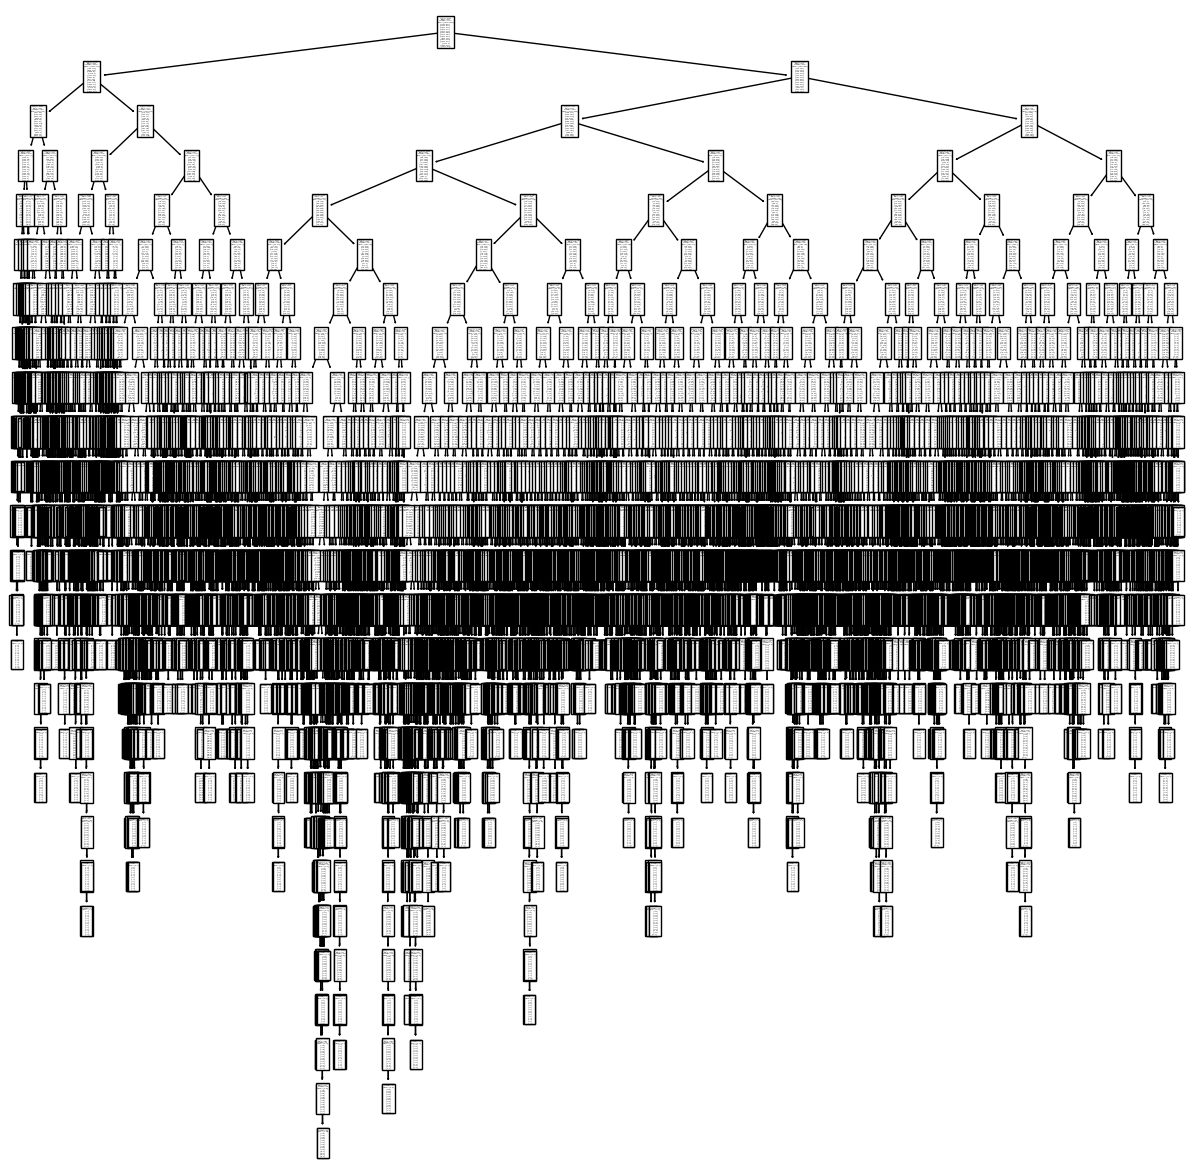

In [17]:
#Run Decision Tree classifier
climate_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
climate_dt.fit(X_train, y_train)
figure(figsize=(15,15))
tree.plot_tree(climate_dt)

In [18]:
#Training accuracy score? Using the cross validation method
y_pred_train = climate_dt.predict(X_train)
print('Train accuracy score: ',cross_val_score(climate_dt, X_train, y_train, cv = 3, scoring='accuracy').mean())
multilabel_confusion_matrix(y_train, y_pred_train)

Train accuracy score:  0.6035904413105344


array([[[12948,     0],
        [    0,  4264]],

       [[11182,     0],
        [    0,  6030]],

       [[11619,     0],
        [    0,  5593]],

       [[13854,     0],
        [    0,  3358]],

       [[13509,     0],
        [    0,  3703]],

       [[13421,     0],
        [    0,  3791]],

       [[14361,     0],
        [    0,  2851]],

       [[12379,     0],
        [    0,  4833]],

       [[13622,     0],
        [    0,  3590]],

       [[ 9535,     0],
        [    0,  7677]],

       [[13637,     0],
        [    0,  3575]],

       [[14492,     0],
        [    0,  2720]],

       [[17212,     0],
        [    0,     0]],

       [[14290,     0],
        [    0,  2922]],

       [[16314,     0],
        [    0,   898]]], dtype=int64)

In [22]:
#Testing accuracy score?
y_pred_test = climate_dt.predict(X_test)
score = accuracy_score(y_test, y_pred_test)
print('Test accuracy score: ',score)

Test accuracy score:  0.6355873126524921


#### Because of the avarage accuracy score and the large number of nodes it contains, I think the decision tree should be prunned.

## 05. Multitable confusion matrix

In [23]:
#Use a multilabel confusion matrix to plot all 15 matrices at once
locations = list({x.split("_")[0] for x in climate.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

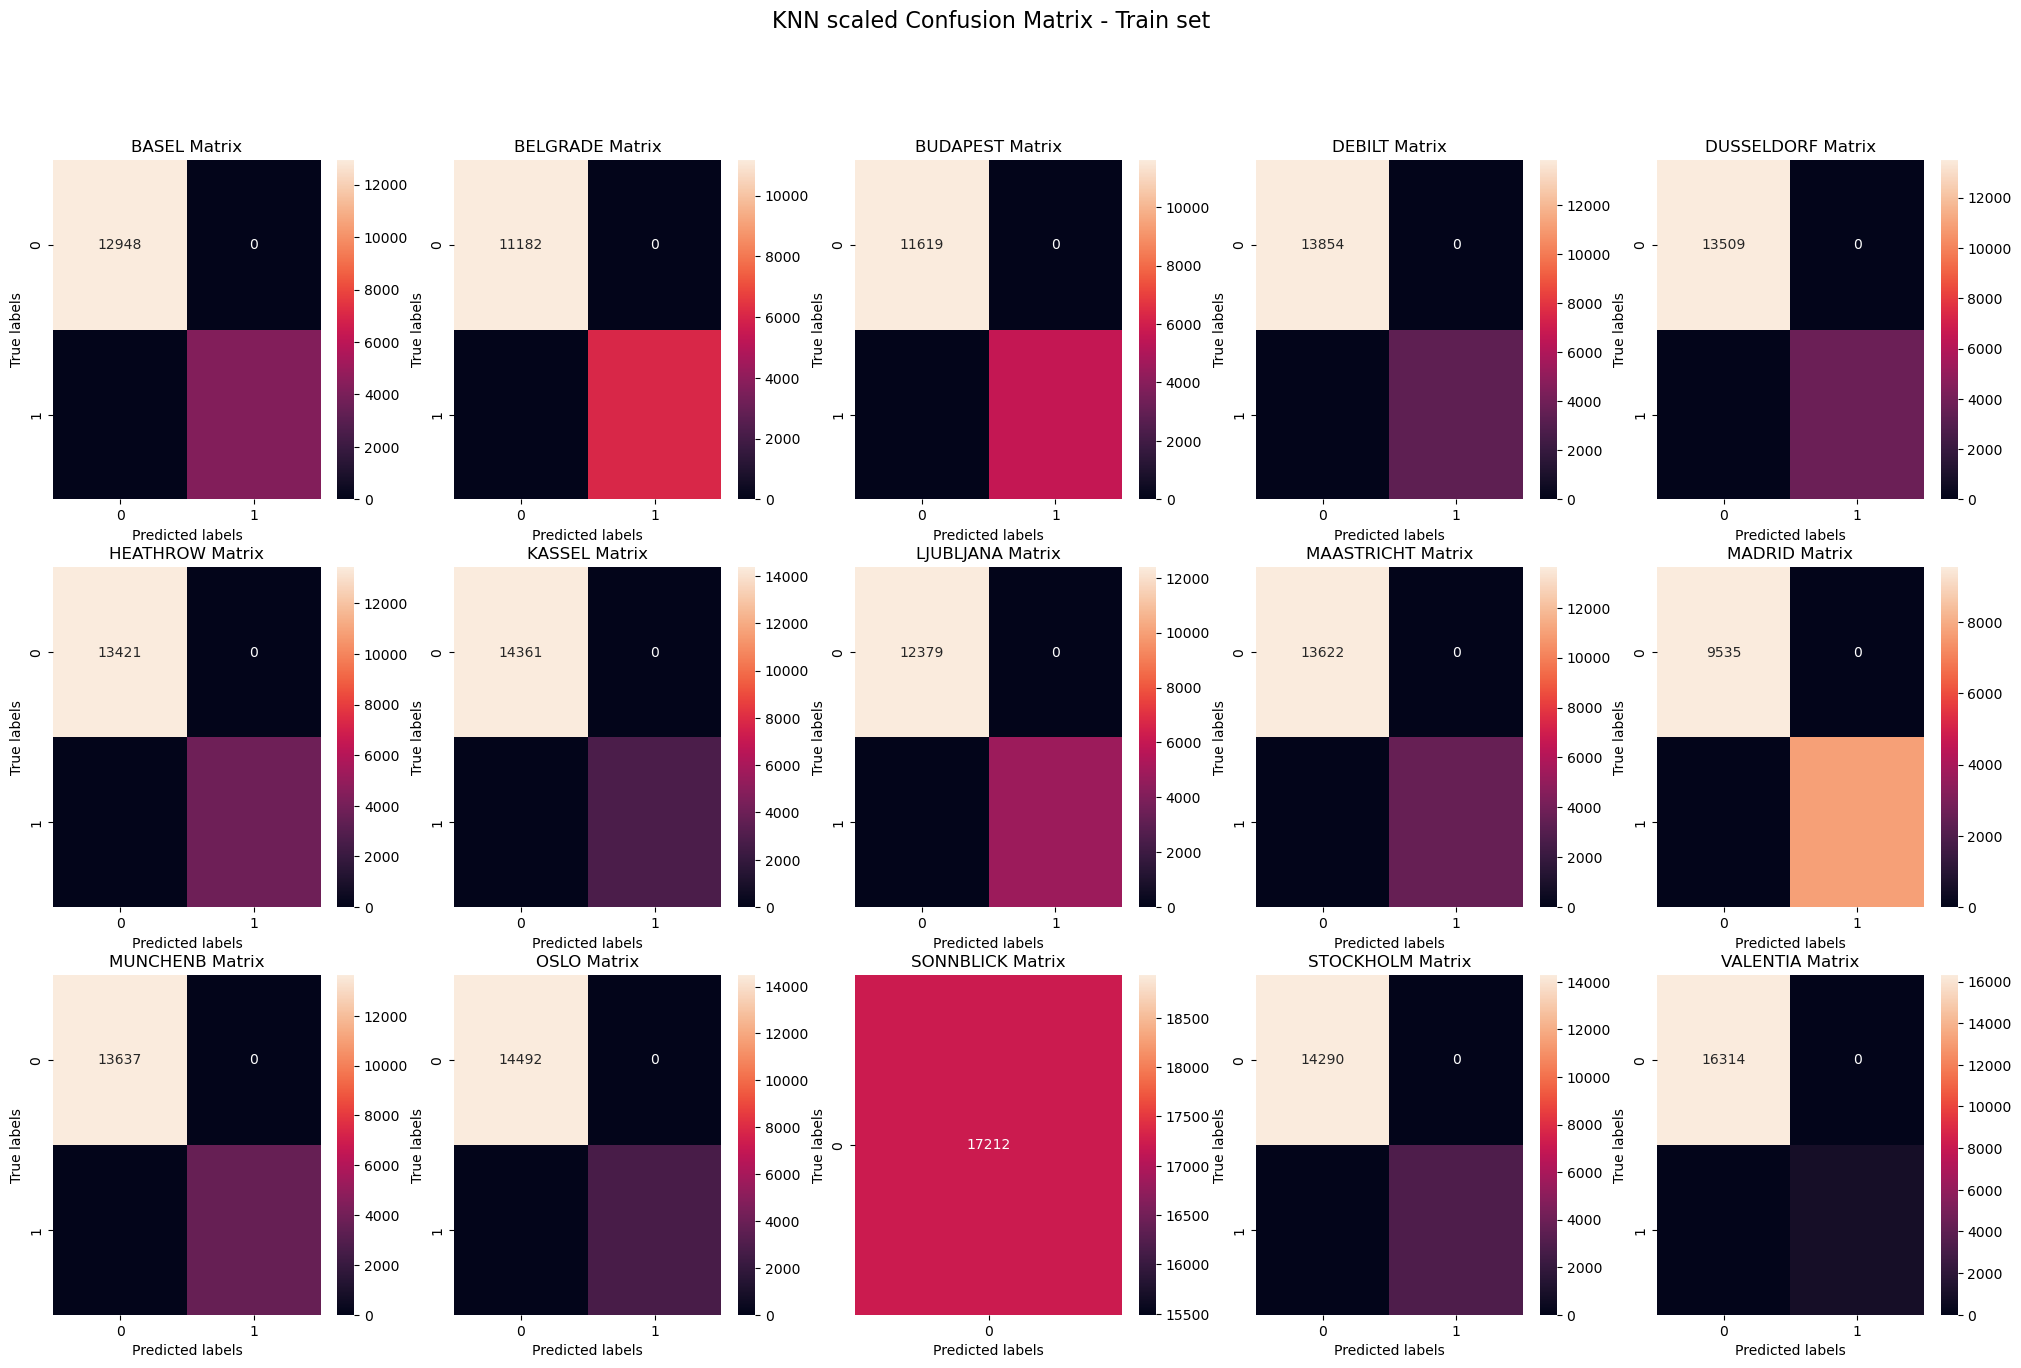

In [25]:
#Plot multilabel confusion matrix for (training accuracy score)
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
figure.suptitle('KNN scaled Confusion Matrix - Train set', fontsize=16)
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred_train[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data.
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

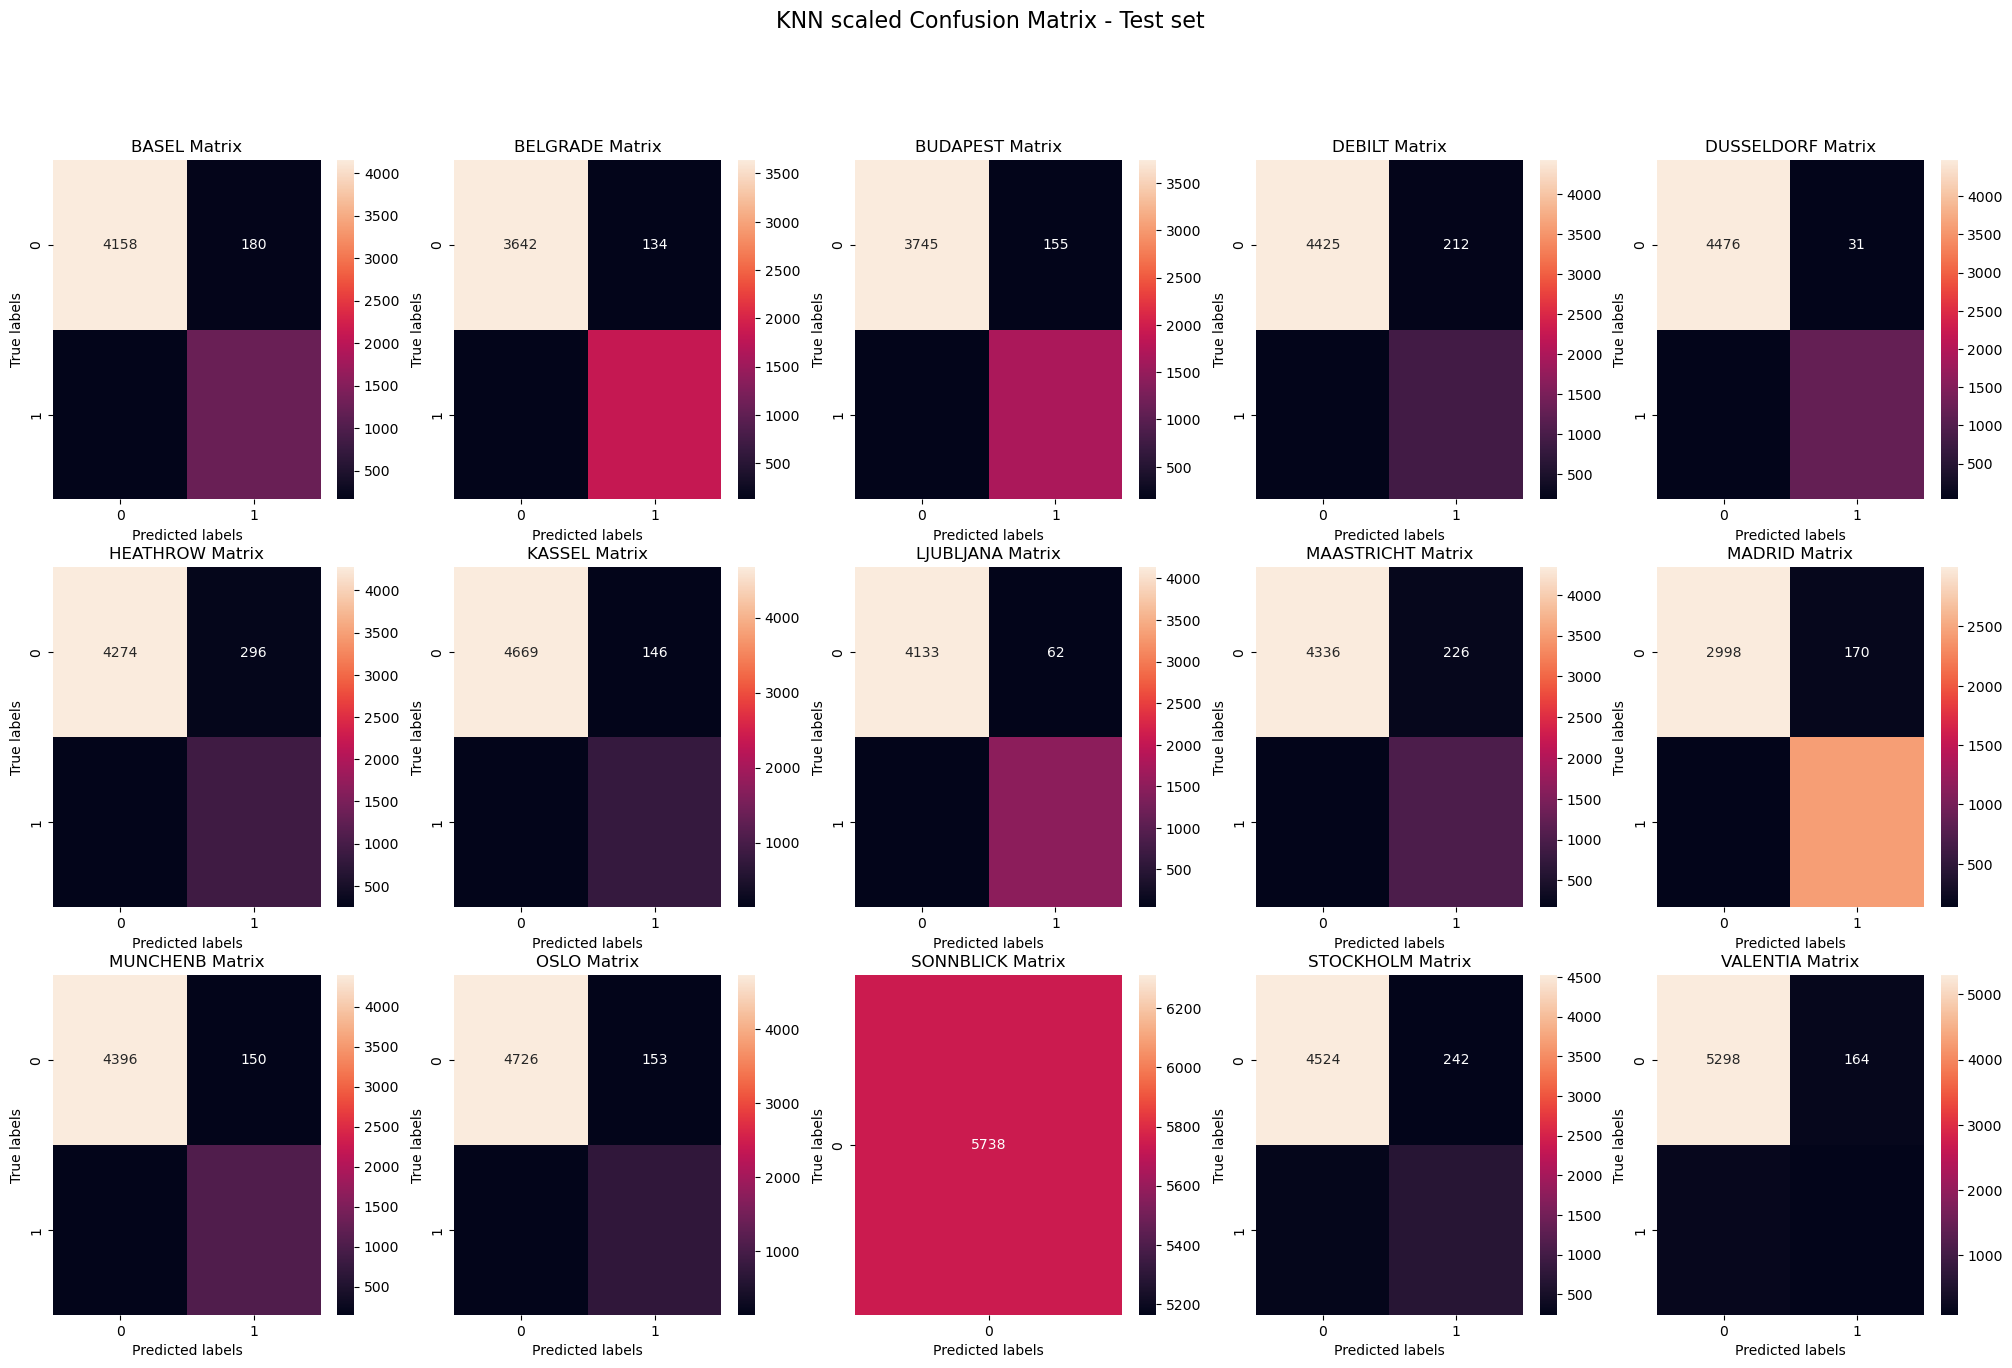

In [26]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
figure.suptitle('KNN scaled Confusion Matrix - Test set', fontsize=16)
labels = ['pleasant', 'unpleasant']   
count=0
accuracy_scores_test = {}
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1
plt.show() 

### Aggregated heatmap

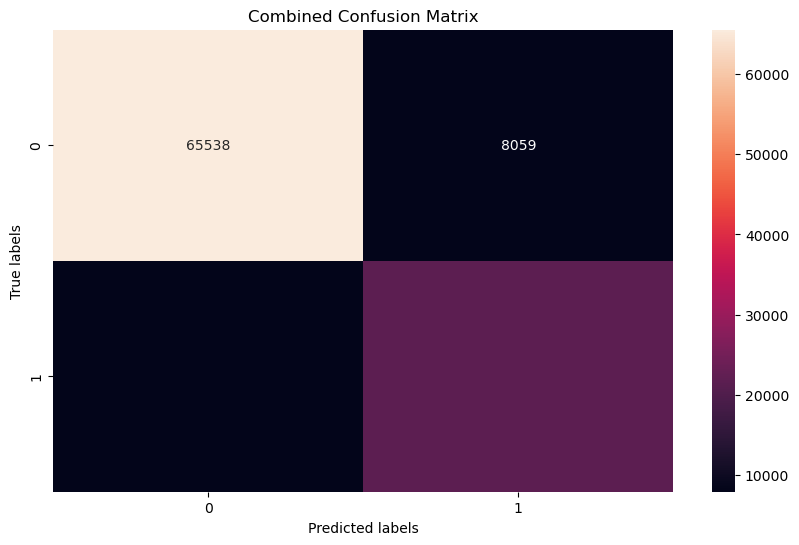

In [27]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(figsize=(10, 6)) 
labels = ['pleasant', 'unpleasant']   
count = 0
all_cm = None

for name in locations:
    cm = confusion_matrix(y_test.loc[:, name + key], y_pred[:, count])
    if all_cm is None:
        all_cm = cm
    else:
        all_cm += cm
    count += 1

disp = ConfusionMatrixDisplay(confusion_matrix=all_cm)
sns.heatmap(all_cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Combined Confusion Matrix')
plt.show()

In [29]:
#Print confusion matrix label annotations
all_cm

array([[65538,  8059],
       [ 7912, 21775]], dtype=int64)

## 06. Calculate the accuracy for each station

In [31]:
# Calculate accuracy for each location
location_accuracies = {}
for count, location in enumerate(locations):
    key = f"{location}_pleasant_weather"
    loc_accuracy = accuracy_score(y_test[key], y_pred[:, count])
    location_accuracies[location] = loc_accuracy
    print(f'Accuracy for {location}: {loc_accuracy}')

Accuracy for BASEL: 0.9407459044963402
Accuracy for BELGRADE: 0.9548623213663298
Accuracy for BUDAPEST: 0.9454513767863367
Accuracy for DEBILT: 0.9315092366678285
Accuracy for DUSSELDORF: 0.98710352039038
Accuracy for HEATHROW: 0.905019170442663
Accuracy for KASSEL: 0.9499825723248518
Accuracy for LJUBLJANA: 0.9808295573370512
Accuracy for MAASTRICHT: 0.9304635761589404
Accuracy for MADRID: 0.9468455907981875
Accuracy for MUNCHENB: 0.9475426978041129
Accuracy for OSLO: 0.9484140815615197
Accuracy for SONNBLICK: 1.0
Accuracy for STOCKHOLM: 0.9092018124782154
Accuracy for VALENTIA: 0.938654583478564


### Summary:
#### The accuracy score for the train dataset is 60.35%, while the accuracy score for the testing set is only 65.56%
#### This indicates that Decision tree model is better fit than the KNN model, but still is not the best fit model 
#### However, all stations have a high accuracy score compared to the KNN model. 
#### There is also 1 station encouters overfitting which is SONNBLICK, which can be explained because the data of this station only contains value 0.